In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, f1_score

import joblib
import warnings
warnings.filterwarnings('ignore')

In [13]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


In [14]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.drop('id', axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [15]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df = pd.get_dummies(df, drop_first=True)

In [16]:
X = df.drop('stroke', axis=1)
y = df['stroke']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f"\nModel: {name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    results.append((name, acc, f1, auc))

pd.DataFrame(results, columns=["Model", "Akurasi", "F1 Score", "ROC AUC"])


Model: Logistic Regression
Confusion Matrix:
[[960   0]
 [ 62   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Model: Random Forest
Confusion Matrix:
[[960   0]
 [ 62   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Model: SVM
Confusion Matrix:
[[960   0]
 [ 62   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00    

,Model,Akurasi,F1 Score,ROC AUC
0,Logistic Regression,0.939335,0.0,0.851210
1,Random Forest,0.939335,0.0,0.805175
2,SVM,0.939335,0.0,0.639516


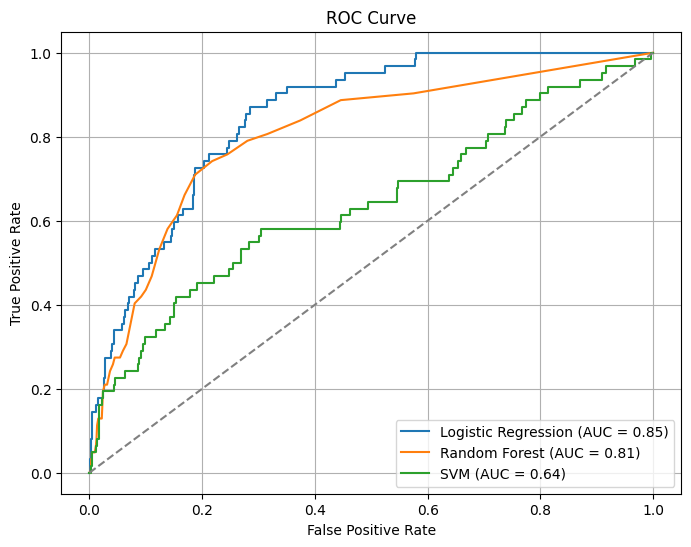

In [18]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
best_model = models['Random Forest']
joblib.dump(best_model, 'stroke_model.pkl')
joblib.dump(scaler, 'stroke_scaler.pkl')

from google.colab import files
files.download('stroke_model.pkl')
files.download('stroke_scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
# Hasil perbandingan ke DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Akurasi", "F1 Score", "ROC AUC"])
results_df.sort_values(by="ROC AUC", ascending=False)

,Model,Akurasi,F1 Score,ROC AUC
1,Random Forest,0.740260,0.642857,0.833425
0,Logistic Regression,0.753247,0.641509,0.822957
2,SVM (Linear Kernel),0.753247,0.641509,0.821671
3,K-Nearest Neighbors,0.733766,0.649573,0.767769


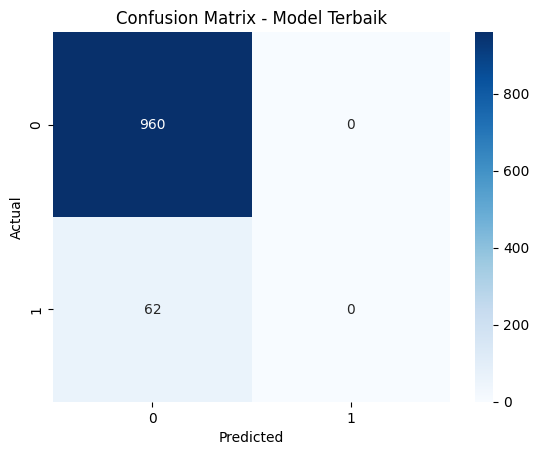

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [24]:
best_model = models["Random Forest"]  # ganti sesuai model terbaikmu
y_pred = best_model.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Model Terbaik")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Laporan lengkap
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [22]:
best_model = models['SVM']  # misalnya ganti ke SVM

In [25]:
import streamlit as st
import numpy as np
import joblib

# Load model dan scaler
model = joblib.load("stroke_model.pkl")
scaler = joblib.load("stroke_scaler.pkl")

st.title("Prediksi Risiko Stroke")
st.write("Masukkan data pasien untuk memprediksi kemungkinan terkena stroke:")

# Input pengguna
gender = st.selectbox("Jenis Kelamin", ["Perempuan", "Laki-laki"])
age = st.number_input("Usia", min_value=0)
hypertension = st.selectbox("Hipertensi", ["Tidak", "Ya"])
heart_disease = st.selectbox("Penyakit Jantung", ["Tidak", "Ya"])
ever_married = st.selectbox("Pernah Menikah", ["Tidak", "Ya"])
work_type = st.selectbox("Jenis Pekerjaan", ["Private", "Self-employed", "Govt_job", "children", "Never_worked"])
residence_type = st.selectbox("Tinggal", ["Urban", "Rural"])
avg_glucose_level = st.number_input("Rata-rata Glukosa", min_value=0.0)
bmi = st.number_input("BMI", min_value=0.0)
smoking_status = st.selectbox("Status Merokok", ["formerly smoked", "never smoked", "smokes", "Unknown"])

# Encode input manual (urutan sesuai training)
def encode_input():
    data = {
        'age': age,
        'avg_glucose_level': avg_glucose_level,
        'bmi': bmi,
        'hypertension': 1 if hypertension == "Ya" else 0,
        'heart_disease': 1 if heart_disease == "Ya" else 0,
        'gender_Male': 1 if gender == "Laki-laki" else 0,
        'ever_married_Yes': 1 if ever_married == "Ya" else 0,
        'work_type_Never_worked': 1 if work_type == "Never_worked" else 0,
        'work_type_Private': 1 if work_type == "Private" else 0,
        'work_type_Self-employed': 1 if work_type == "Self-employed" else 0,
        'work_type_children': 1 if work_type == "children" else 0,
        'Residence_type_Urban': 1 if residence_type == "Urban" else 0,
        'smoking_status_formerly smoked': 1 if smoking_status == "formerly smoked" else 0,
        'smoking_status_never smoked': 1 if smoking_status == "never smoked" else 0,
        'smoking_status_smokes': 1 if smoking_status == "smokes" else 0
    }

    ordered_features = [
        'age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease',
        'gender_Male', 'ever_married_Yes',
        'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children',
        'Residence_type_Urban',
        'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes'
    ]

    return np.array([data[feature] for feature in ordered_features]).reshape(1, -1)

if st.button("Prediksi"):
    input_data = encode_input()
    input_scaled = scaler.transform(input_data)
    result = model.predict(input_scaled)

    if result[0] == 1:
        st.error("⚠️ Pasien berisiko tinggi terkena stroke.")
    else:
        st.success("✅ Pasien tidak menunjukkan risiko stroke.")

ModuleNotFoundError: No module named 'streamlit'